# comparison of surrogate  modeling and mormal ML Model for path loss prediction in Indoor scenerio

In [33]:

''' This work would compare path loss prediction using surrogate ML model \
and a conventional ML model'''

' This work would compare path loss prediction models of Aided model with conventional calculation and Un Aided model model '

In [34]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:

import os
path=os.getcwd()

df=pd.read_csv("external_data/SVR_PATHLOSS/measurements.csv")
df.head()

,lat,lon,elev,PLreal,dist,horAngle,vertAngle,attVer,attHor,PLecc33,PLhata,BTS_ID
0,-8.077576,-34.899261,6.0,138.300000,1.253664,-4.910256,1.730309,17.6,0.04,152.303196,136.017019,BTS_01
1,-8.077570,-34.899296,6.0,137.575000,1.255340,-4.748666,1.732620,17.6,0.04,152.320961,136.036942,BTS_01
2,-8.077567,-34.899223,6.0,137.266667,1.250440,-5.040891,1.725861,17.6,0.06,152.268963,135.978618,BTS_01
3,-8.077550,-34.899174,6.0,133.633333,1.245799,-5.194580,1.719459,17.6,0.06,152.219550,135.923168,BTS_01
4,-8.077547,-34.899319,6.0,142.100000,1.254717,-4.586653,1.731762,17.6,0.04,152.314363,136.029543,BTS_01


In [36]:
df.describe()

,lat,lon,elev,PLreal,dist,horAngle,vertAngle,attVer,attHor,PLecc33,PLhata
count,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000,9308.000000
mean,-8.071632,-34.895512,5.788294,130.636700,0.861672,-19.906013,1.113148,14.437336,10.686167,144.664755,126.981579
std,0.003196,0.003373,1.630327,11.260306,0.490566,74.709105,0.731619,9.116601,14.073497,8.552796,10.411708
min,-8.077576,-34.901241,2.024574,90.933333,0.009973,-179.829650,0.010988,0.000000,0.000000,101.529815,63.888406
25%,-8.074270,-34.898018,4.391688,123.000000,0.510968,-79.613506,0.597627,7.887500,0.420000,139.789144,121.598345
50%,-8.071122,-34.896057,5.850183,132.233333,0.794605,-4.761109,0.898547,16.175000,3.030000,145.346604,128.264677
75%,-8.069141,-34.892368,6.965991,138.650000,1.084100,19.271611,1.409569,23.710000,17.810000,149.912148,133.353489
max,-8.065820,-34.889256,10.431388,158.800000,2.348432,179.983097,3.567659,23.710000,55.700000,161.110828,145.556176


In [37]:
df.corr()

,lat,lon,elev,PLreal,dist,horAngle,vertAngle,attVer,attHor,PLecc33,PLhata
lat,1.000000,0.293787,0.178931,0.101057,0.215010,-0.192187,0.173549,-0.023956,-0.040116,0.210175,0.203441
lon,0.293787,1.000000,0.230081,0.134710,0.086778,-0.084345,0.097931,0.019832,-0.155948,-0.037914,-0.053342
elev,0.178931,0.230081,1.000000,0.354722,0.123924,0.034208,0.160853,-0.087061,0.036374,0.056952,0.044018
PLreal,0.101057,0.134710,0.354722,1.000000,0.400268,-0.175314,0.394972,-0.281365,-0.001312,0.353685,0.340771
dist,0.215010,0.086778,0.123924,0.400268,1.000000,0.105362,0.987642,-0.787973,-0.417235,0.933405,0.910245
horAngle,-0.192187,-0.084345,0.034208,-0.175314,0.105362,1.000000,0.151685,-0.197859,-0.297506,0.066946,0.053357
vertAngle,0.173549,0.097931,0.160853,0.394972,0.987642,0.151685,1.000000,-0.800360,-0.449393,0.903858,0.875587
attVer,-0.023956,0.019832,-0.087061,-0.281365,-0.787973,-0.197859,-0.800360,1.000000,0.542519,-0.699463,-0.675234
attHor,-0.040116,-0.155948,0.036374,-0.001312,-0.417235,-0.297506,-0.449393,0.542519,1.000000,-0.424665,-0.412774
PLecc33,0.210175,-0.037914,0.056952,0.353685,0.933405,0.066946,0.903858,-0.699463,-0.424665,1.000000,0.997387


# Train test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
df.columns

Index(['lat', 'lon', 'elev', 'PLreal', 'dist', 'horAngle', 'vertAngle',
       'attVer', 'attHor', 'PLecc33', 'PLhata', 'BTS_ID'],
      dtype='object')

In [40]:
X=df[['lat', 'lon', 'elev', 'dist', 'horAngle', 'vertAngle',
       'attVer', 'attHor']].values # converting pandas dataframe to numpy array
y=df['PLreal'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler= MinMaxScaler()

In [15]:
scaler.fit(X_train) # Normalize the training data 
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
print(X_train.shape)

(6515, 8)


In [101]:
# create the model without training 
normal_model = Sequential()
normal_model.add(Dense(64,activation = 'relu'))
normal_model.add(Dense(32,activation = 'relu'))
normal_model.add(Dense(32,activation = 'relu'))
normal_model.add(Dense(16,activation = 'relu'))
normal_model.add(Dense(8,activation = 'relu'))
normal_model.add(Dense(1))

normal_model.compile(optimizer='adam',loss='mse')


In [102]:
normal_model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=500,epochs=200)
normal_model.summary()

Epoch 1/200
14/14 [==============================] - 0s 20ms/step - loss: 16219.6768 - val_loss: 15002.3330
Epoch 2/200
14/14 [==============================] - 0s 8ms/step - loss: 13799.0684 - val_loss: 11584.6719
Epoch 3/200
14/14 [==============================] - 0s 5ms/step - loss: 9291.5225 - val_loss: 6099.0327
Epoch 4/200
14/14 [==============================] - 0s 7ms/step - loss: 4488.6851 - val_loss: 3681.9097
Epoch 5/200
14/14 [==============================] - 0s 6ms/step - loss: 3201.2478 - val_loss: 2447.9194
Epoch 6/200
14/14 [==============================] - 0s 7ms/step - loss: 2057.3411 - val_loss: 1561.0300
Epoch 7/200
14/14 [==============================] - 0s 8ms/step - loss: 1225.6326 - val_loss: 856.2451
Epoch 8/200
14/14 [==============================] - 0s 7ms/step - loss: 645.7950 - val_loss: 420.1966
Epoch 9/200
14/14 [==============================] - 0s 8ms/step - loss: 316.4963 - val_loss: 228.0557
Epoch 10/200
14/14 [==============================] - 0

Epoch 81/200
14/14 [==============================] - 0s 5ms/step - loss: 71.0184 - val_loss: 73.9165
Epoch 82/200
14/14 [==============================] - 0s 4ms/step - loss: 69.6354 - val_loss: 72.5641
Epoch 83/200
14/14 [==============================] - 0s 4ms/step - loss: 68.6466 - val_loss: 71.1147
Epoch 84/200
14/14 [==============================] - 0s 4ms/step - loss: 68.5908 - val_loss: 72.2074
Epoch 85/200
14/14 [==============================] - 0s 5ms/step - loss: 68.2195 - val_loss: 72.4941
Epoch 86/200
14/14 [==============================] - 0s 4ms/step - loss: 69.0703 - val_loss: 71.4129
Epoch 87/200
14/14 [==============================] - 0s 4ms/step - loss: 72.7798 - val_loss: 72.5730
Epoch 88/200
14/14 [==============================] - 0s 4ms/step - loss: 70.1207 - val_loss: 70.6814
Epoch 89/200
14/14 [==============================] - 0s 5ms/step - loss: 68.2427 - val_loss: 70.5870
Epoch 90/200
14/14 [==============================] - 0s 4ms/step - loss: 69.6028 

14/14 [==============================] - 0s 4ms/step - loss: 63.2106 - val_loss: 67.8506
Epoch 161/200
14/14 [==============================] - 0s 4ms/step - loss: 64.2077 - val_loss: 66.1515
Epoch 162/200
14/14 [==============================] - 0s 4ms/step - loss: 63.7717 - val_loss: 67.8681
Epoch 163/200
14/14 [==============================] - 0s 4ms/step - loss: 64.1173 - val_loss: 66.9496
Epoch 164/200
14/14 [==============================] - 0s 4ms/step - loss: 63.6866 - val_loss: 68.5512
Epoch 165/200
14/14 [==============================] - 0s 4ms/step - loss: 65.8931 - val_loss: 70.9505
Epoch 166/200
14/14 [==============================] - 0s 4ms/step - loss: 67.6748 - val_loss: 65.2474
Epoch 167/200
14/14 [==============================] - 0s 4ms/step - loss: 64.6553 - val_loss: 64.7468
Epoch 168/200
14/14 [==============================] - 0s 4ms/step - loss: 63.5614 - val_loss: 64.1366
Epoch 169/200
14/14 [==============================] - 0s 4ms/step - loss: 63.0821 - va

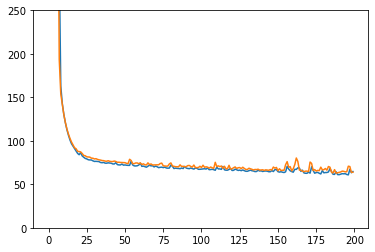

In [120]:
# ploting of the loss function for the normal model
import matplotlib.pyplot as plt
plt.ylim(0,250)
plt.plot(model_unaided.history['loss'])
plt.plot(model_unaided.history['val_loss'])

# Aided Model

In [89]:
'''
using mathematical model to generate part of the input data set to the ML model

'''
Xa=df[['lat', 'lon', 'elev', 'PLreal', 'dist', 'horAngle', 'vertAngle',
       'attVer', 'attHor', 'PLecc33', 'PLhata']].values # converting pandas dataframe to numpy array
ya=df['PLreal'].values

In [90]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.3, random_state=42)

In [91]:
scaler.fit(Xa_train)
Xa_train= scaler.transform(Xa_train)
Xa_test= scaler.transform(Xa_test)
print(Xa_train.shape)

(6515, 11)


In [92]:
aided_model = Sequential()
aided_model.add(Dense(64,activation = 'relu'))
aided_model.add(Dense(32,activation = 'relu'))
aided_model.add(Dense(32,activation = 'relu'))
aided_model.add(Dense(16,activation = 'relu'))
aided_model.add(Dense(8,activation = 'relu'))
aided_model.add(Dense(1))
aided_model.compile(optimizer='adam',loss='mse')
aided_model.fit(x=Xa_train,y=ya_train,validation_data=(Xa_test,ya_test),batch_size=500,epochs=200)

Epoch 1/200
14/14 [==============================] - 0s 20ms/step - loss: 17067.4648 - val_loss: 16849.9336
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 16734.0820 - val_loss: 16282.4561
Epoch 3/200
14/14 [==============================] - 0s 8ms/step - loss: 15846.6650 - val_loss: 14809.5938
Epoch 4/200
14/14 [==============================] - 0s 6ms/step - loss: 13558.7930 - val_loss: 11095.6816
Epoch 5/200
14/14 [==============================] - ETA: 0s - loss: 11180.418 - 0s 5ms/step - loss: 8363.2998 - val_loss: 4079.2915
Epoch 6/200
14/14 [==============================] - 0s 6ms/step - loss: 1587.8425 - val_loss: 312.5175
Epoch 7/200
14/14 [==============================] - 0s 6ms/step - loss: 521.7529 - val_loss: 216.4117
Epoch 8/200
14/14 [==============================] - 0s 5ms/step - loss: 204.6559 - val_loss: 217.3113
Epoch 9/200
14/14 [==============================] - 0s 5ms/step - loss: 187.9222 - val_loss: 169.6765
Epoch 10/200
14/14 [=====

14/14 [==============================] - 0s 7ms/step - loss: 1.7109 - val_loss: 1.8396
Epoch 82/200
14/14 [==============================] - 0s 6ms/step - loss: 1.6450 - val_loss: 1.7796
Epoch 83/200
14/14 [==============================] - 0s 6ms/step - loss: 1.5882 - val_loss: 1.7312
Epoch 84/200
14/14 [==============================] - 0s 6ms/step - loss: 1.5373 - val_loss: 1.6588
Epoch 85/200
14/14 [==============================] - 0s 8ms/step - loss: 1.4869 - val_loss: 1.6080
Epoch 86/200
14/14 [==============================] - 0s 7ms/step - loss: 1.4475 - val_loss: 1.5562
Epoch 87/200
14/14 [==============================] - 0s 6ms/step - loss: 1.4141 - val_loss: 1.5419
Epoch 88/200
14/14 [==============================] - 0s 8ms/step - loss: 1.3976 - val_loss: 1.5049
Epoch 89/200
14/14 [==============================] - 0s 5ms/step - loss: 1.3366 - val_loss: 1.4129
Epoch 90/200
14/14 [==============================] - 0s 6ms/step - loss: 1.3091 - val_loss: 1.4564
Epoch 91/200


14/14 [==============================] - 0s 7ms/step - loss: 0.3422 - val_loss: 0.3574
Epoch 163/200
14/14 [==============================] - 0s 8ms/step - loss: 0.3285 - val_loss: 0.3612
Epoch 164/200
14/14 [==============================] - 0s 9ms/step - loss: 0.3288 - val_loss: 0.3422
Epoch 165/200
14/14 [==============================] - 0s 7ms/step - loss: 0.3186 - val_loss: 0.3374
Epoch 166/200
14/14 [==============================] - 0s 7ms/step - loss: 0.3182 - val_loss: 0.3337
Epoch 167/200
14/14 [==============================] - 0s 8ms/step - loss: 0.3187 - val_loss: 0.3337
Epoch 168/200
14/14 [==============================] - 0s 9ms/step - loss: 0.3058 - val_loss: 0.3260
Epoch 169/200
14/14 [==============================] - 0s 5ms/step - loss: 0.3046 - val_loss: 0.3307
Epoch 170/200
14/14 [==============================] - 0s 7ms/step - loss: 0.3036 - val_loss: 0.3278
Epoch 171/200
14/14 [==============================] - 0s 7ms/step - loss: 0.3017 - val_loss: 0.3106
Epoc

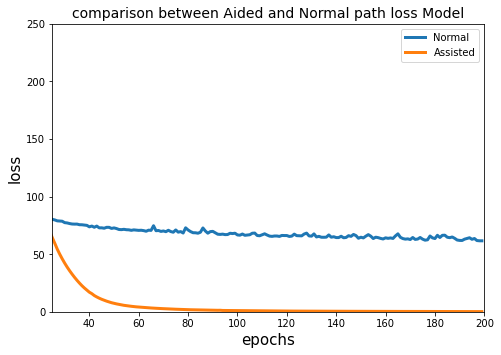

In [106]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xlim(25,200)
ax.set_ylim(0,250)
ax.set_title('comparison between Aided and Normal path loss Model',fontsize=14)
ax.set_xlabel('epochs',fontsize=15)
ax.set_ylabel('loss',fontsize=15)
ax.plot(normal_model.history.history['loss'],label='Normal',lw=3)

ax.plot(aided_model.history.history['val_loss'],label='Assisted',lw=3)
ax.legend()

In [107]:
normal_model.evaluate(X_test,y_test,verbose=0) # Evaluation of the Normal model

62.650264739990234

In [108]:
aided_model.evaluate(Xa_test,ya_test,verbose=0) # Evalutation of the aided model

0.1618800163269043

In [122]:
test_predictions= aided_model.predict(Xa_test)
print(type(test_predictions))
print(Xa_test.shape)

<class 'numpy.ndarray'>
(2793, 11)


In [123]:
test_predictions=pd.Series(test_predictions.reshape(2793,))

In [124]:
actual_df=pd.DataFrame(ya_test,columns=['Test True Y'])

In [125]:
comp_df= pd.concat([actual_df,test_predictions],axis=1)

In [126]:
comp_df.columns=['Test True', 'Predicted']

In [127]:
comp_df["diff"]=comp_df["Test True"]-comp_df["Predicted"]

In [128]:
comp_df

,Test True,Predicted,diff
0,132.933333,133.193588,-0.260255
1,149.000000,148.896561,0.103439
2,136.600000,136.774124,-0.174124
3,134.200000,134.023254,0.176746
4,111.433333,111.618050,-0.184716
...,...,...,...
2788,114.833333,114.708130,0.125203
2789,135.066667,134.820724,0.245942
2790,128.733333,129.000565,-0.267231
2791,139.033333,139.377792,-0.344459


<AxesSubplot:xlabel='Test True', ylabel='Predicted'>

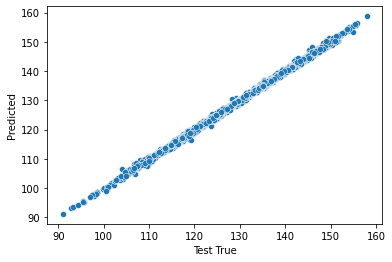

In [129]:
sns.scatterplot(x='Test True', y= 'Predicted', data=comp_df)

In [117]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [130]:
mean_absolute_error(comp_df["Test True"],comp_df["Predicted"])

0.28481490341938126

In [131]:
mean_squared_error(comp_df["Test True"],comp_df["Predicted"])

0.1618798957780156

# Support vector  regression Model section 